## Q3) Outlier Detection
Outlier detection (also known as '*anomaly detection*') is the process of finding observation points that are very distant from other observations. Such observation points are called outliers or anomalies. In this question,  you will employ simple visualization and statistical techniques to find the outliers and then, you will apply  outlier detection algorithms. 

You will be using the same **"customer_segemntation"** dataset that was used in the Q1. 


In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#loading the dataset
cust_df = pd.read_csv("/content/drive/My Drive/DMA3/customer_segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [0]:
cust = cust_df.copy()
cust = cust.dropna()
# print(cust.columns)

### **Box-Plots**

Plot box-plots for "**Income**" and "**Card Debt**" attributes and comment on the results. 

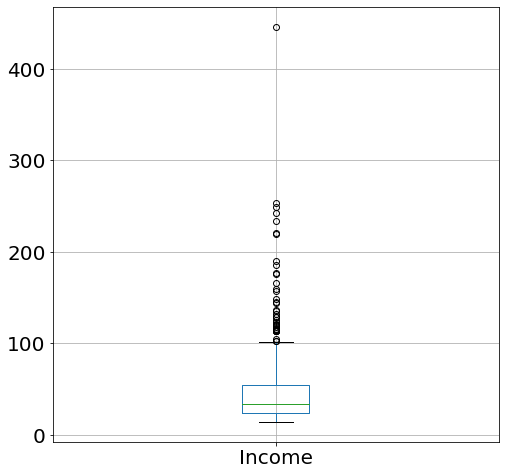

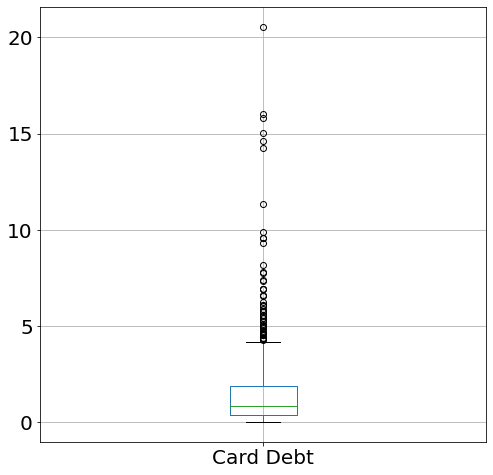

In [0]:
#Write code here
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cust.boxplot(column=['Income'], ax=ax, fontsize=20)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cust.boxplot(column=['Card Debt'], ax=ax, fontsize=20)

Both boxplots show a large number with roughly the same distribution

### **Scatter-plot**

Plot scatter-plot for **Income Vs DebtIncomeRatio**. Comment if it shows any outliers. Use matplotlib.pyplot library for scatter-plot.

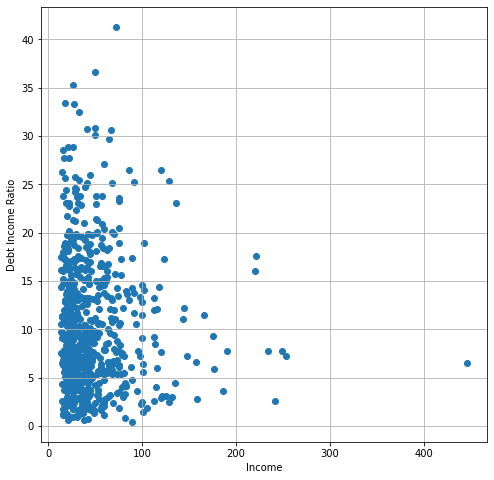

In [0]:
#Write code here
plt.figure(figsize=(8,8))
plt.scatter(cust['Income'], cust['DebtIncomeRatio'])
plt.xlabel('Income')
plt.ylabel('Debt Income Ratio')
plt.grid()
plt.show()

We can see some outliers for example the point at the far right of the plot and the two points with an income between 200 and 300 and a debt income ratio between 15 and 20

### **Z_score**

Z-score tells how many standard deviations is a certain data point away from the mean. For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their z-scores.

In [0]:
#Write code here
age_score = np.abs(zscore(cust['Age']))
DIR_score = np.abs(zscore(cust['DebtIncomeRatio']))
other_debt_score = np.abs(zscore(cust['Other Debt']))
print(np.where(age_score > 3))
print(np.where(DIR_score > 3))
print(np.where(other_debt_score > 3))


(array([], dtype=int64),)
(array([ 36, 409, 480, 486, 537, 678, 697]),)
(array([ 17,  61,  63, 157, 253, 280, 286, 360, 366, 370, 409, 422, 437,
       464, 467]),)


* **What z-score threshold did you use to detect the outliers and why?**
I used the threshold of 3 as under the bell curve 99% of the data is represented within 3 standard deviations, hence any value greater than 3 can be treated as an outlier

### ***IQR***

For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their IQR values.

For this, calculate the first (q1) and third quartile (q3). An outlier is then a data point  that lies outside the interquartile range. That is:
*   *Lower outlier= Q1 - (k x IQR)*
*   *Higher outlier= Q3 + (k x IQR)*

Choose an appropriate 'k' for this part.

In [0]:
#Write code here
Q1 = cust.quantile(q=0.25)
Q3 = cust.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

print(np.where(cust['Age'] < lower_bound['Age']), np.where(cust['Age'] > upper_bound['Age']))
print(np.where(cust['Other Debt'] < lower_bound['Other Debt']), np.where(cust['Other Debt'] > upper_bound['Other Debt']))
print(np.where(cust['DebtIncomeRatio'] < lower_bound['DebtIncomeRatio']), np.where(cust['DebtIncomeRatio'] > upper_bound['DebtIncomeRatio']))

(array([], dtype=int64),) (array([], dtype=int64),)
(array([], dtype=int64),) (array([  4,  17,  29,  31,  36,  38,  61,  63,  80, 113, 147, 157, 179,
       189, 209, 237, 253, 263, 274, 280, 286, 311, 320, 339, 360, 366,
       370, 385, 404, 409, 422, 437, 452, 464, 467, 484, 493, 495, 525,
       534, 537, 550, 571, 586, 624, 646, 678, 682]),)
(array([], dtype=int64),) (array([ 36,  63,  80, 139, 303, 320, 393, 409, 464, 480, 486, 537, 678,
       697]),)


* **What k-value did you use to detect the outliers and why?**
3, as this is roughly the equivalent of choosing 3 standard deviations as the threshold for the Z score

* **Which parameter (IQR or Z-score) is better outlier detection? Give reason.**
A large number of outliers can sway the mean which makes the Z score method a bit hard to advocate, hence using the IQR which takes advantage of the median is more preferable

### **Outlier Detection using LOC (Local Outlier Factor)**

LOF uses density-based outlier detection to identify local outliers. An anomaly score is assigned to each sample which measures the local deviation of density of a this sample with respect to its neighbors. 


**1.** Tranform the features by scaling them to a 
given range(e.g. 0-1):

In [0]:
#Write your code here
cust.drop(columns=['Address', 'Customer Id'], inplace=True)
scaled = MinMaxScaler().fit(cust)
scaled = scaled.transform(cust)

**2.** Implement LOC algorithm using sklearn. Choose the parameters that will be passed into the function:

In [0]:
#Write your code here
LOF = LocalOutlierFactor(n_neighbors=10)
Y = LOF.fit_predict(scaled)
outliers = 0
labels = ['normal']*700
for i in range(len(Y)):
    if(Y[i] == -1):
        outliers+=1
        labels[i] = 'anomaly'

print("Number of Outliers: ", outliers)

Number of Outliers:  16


Run LOC algorithm multiple times with different values for the '**n_neighbors** 'paramater. 

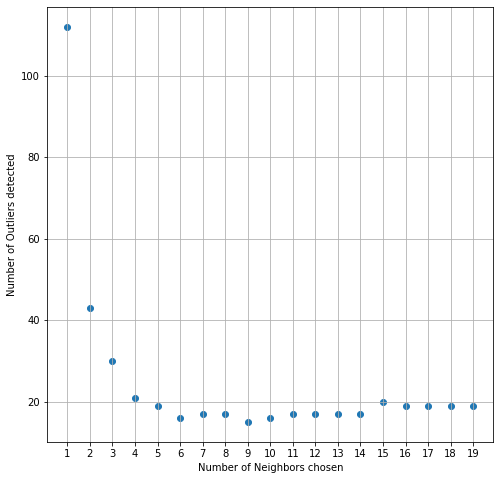

In [0]:
res = []
for n in range(1, 20):
    LOF = LocalOutlierFactor(n_neighbors=n)
    Y = LOF.fit_predict(scaled)
    outliers = 0
    for i in Y:
        if(i == -1):
            outliers+=1
    res.append(outliers)

plt.figure(figsize=(8,8))
x_axis = range(1, 20)
plt.xticks(ticks=range(1,20))
plt.scatter(x_axis, res,)
plt.xlabel('Number of Neighbors chosen')
plt.ylabel('Number of Outliers detected')
plt.grid()
plt.show()

* **How did the results of LOC alogrithm vary by changing the value of 'n_neighbors'? What parameter value you ended up choosing and why?**

As we decrease the number of neighbours, the number of outliers increases as the approach becomes very local, hence I have chosen 10 neighbors as around this number the nuber of outliers detected becomes relatively stable with 16~17 outliers being detected 

**3.** Visualize the results using this function. You may also implement your own visualization function.

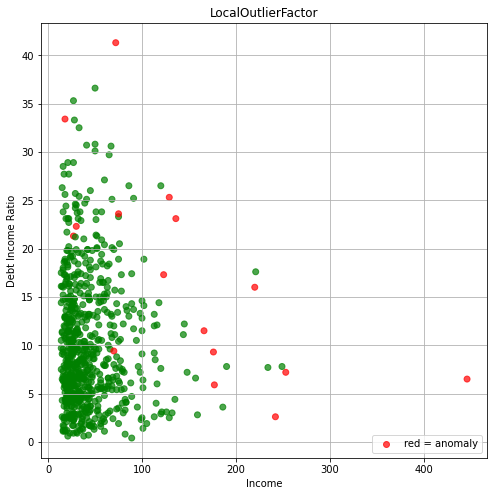

In [0]:
def plot_model(labels, alg_name):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    color_code = {'anomaly':'red', 'normal':'green'}
    colors = [color_code[x] for x in labels]

    ax.scatter(cust.iloc[:,3], cust.iloc[:,7], color=colors, marker='o', label='red = anomaly', alpha=0.7)
    ax.legend(loc="lower right")

    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('red')
    plt.grid()
    ax.set_title(alg_name)
    ax.set_xlabel('Income')
    ax.set_ylabel('Debt Income Ratio')

X=cust
plot_model(labels, 'LocalOutlierFactor')


### **Isolation Forest**

Isolation Forest is an outlier detection algoritm that is based on the Decision Trees. It spearates the outliers by randomly selecting a certain attribute and then randomly selecting a split value between the max and min values of this feature.

**1.** Implement Isolation Forest algorithm using sklearn. Choose the parameters that will be passed into the function:

In [0]:
#Write your code here
IF = IsolationForest(max_samples=200)
IF.fit(cust)
Y = IF.predict(cust)
labels = ['normal']*700
for i in range(len(Y)):
    if Y[i] == -1:
        labels[i] = 'anomaly'


* **What value did you use for the 'max_samples'?**
200 samples

**2.** Visualize the results using this function. You may also implement your own visualization function.

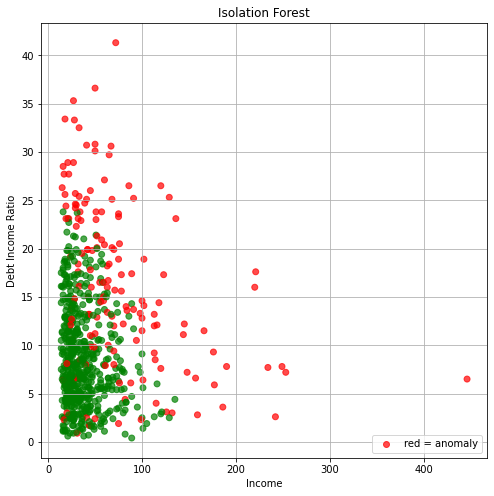

In [0]:
plot_model(labels, 'Isolation Forest')

* **Compare the results from both LOC and Isolation Forest:** 


*Comparison:* Isolation forest seems to perform a lot more aggresively and captures almost all points away from the cluster on the left as an outlier but also classifies some of the points within the cluster as an outlier